In [1]:
#%matplotlib inline
#%config InlineBackend.close_figures=False

In [1]:
import serial # import Serial Library
import numpy # Import numpy
import matplotlib
matplotlib.use('nbagg')
import matplotlib.pyplot as plt # import matplot library

#%matplotlib inline
#%config InlineBackend.close_figures=False

from drawnow import *
plt.ion() #matplotlib  interactive mode of plotting data

tempC = []
pressure = []
cnt = 0
avgWindowTemp=20
avgWindowPressure=90000


arduinoData = serial.Serial('com3', 115200)

def makeFig():
    plt.ylim(avgWindowTemp-avgWindowTemp*0.01, avgWindowTemp+avgWindowTemp*0.01)# prevent y axis from re-scaling
    plt.title('My Live Streaming Sensor Data')
    #plt.grid(True) #now grid corresponds to pressure
    plt.ylabel('TempC')
    plt.plot(tempC, 'ro-', label='Degrees C')
    plt.legend(loc='upper left')
    #Second y axis
    plt2=plt.twinx()
    plt.ylim(avgWindowPressure-avgWindowPressure*0.001, avgWindowPressure+avgWindowPressure*0.0005)
    #lets do one fixed pressure scale
    #plt.ylim(88490, 88502)
    plt2.plot(pressure, 'b^-', label='Pressure (Pa)')
    plt.grid(True)
    plt.ylabel('Pressure (Pa)') # naming the other axis
    plt2.legend(loc='upper right')
    plt2.ticklabel_format(useOffset=False) #removing exponential formatting of the axis data (was already normal for me)
    plt.draw()




while True: #while loop that alwais loops
    while (arduinoData.inWaiting()==0):# doesn't do anything unless there's data
        pass #do nothing
    # Here is our data
    arduinoString = arduinoData.readline()
    #print arduinoString

    dataArray = arduinoString.split(',')

    temp = float(dataArray[0]) # temperature in C
    P    = float(dataArray[1]) # pressure in Pa
    #print temp, " , ", P
    tempC.append(temp)
    pressure.append(P)
    #print tempC
    drawnow(makeFig)
    plt.pause(.000001)# otherwise drawnow glitches
    cnt=cnt+1
    if(cnt > 50):
        tempC.pop(0) # pop out first elements
        pressure.pop(0)
    avgWindowTemp=sum(tempC)/len(tempC)
    avgWindowPressure=sum(pressure)/len(pressure)




ValueError: Unrecognized backend string "nbagg": valid strings are ['pgf', 'cairo', 'MacOSX', 'CocoaAgg', 'gdk', 'ps', 'GTKAgg', 'GTK', 'QtAgg', 'template', 'FltkAgg', 'emf', 'GTK3Cairo', 'GTK3Agg', 'WX', 'Qt4Agg', 'TkAgg', 'agg', 'svg', 'GTKCairo', 'WXAgg', 'pdf']

In [3]:
matplotlib.__version__

'1.2.0'

In [ ]:
from mpld3 import plugins

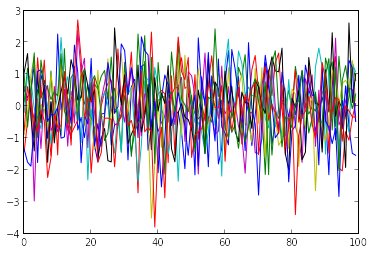

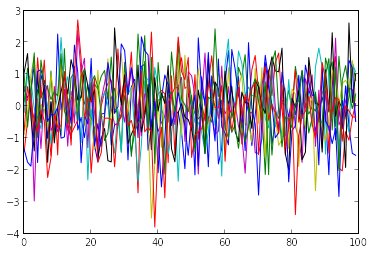

In [6]:


%matplotlib inline
import time
import pylab as pl
from IPython import display
for i in range(10):
    pl.plot(pl.randn(100))
    display.clear_output(wait=True)
    display.display(pl.gcf())
    time.sleep(1.0)



In [2]:


%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import mpld3
mpld3.enable_notebook()



C:\Python27\lib\site-packages\ipykernel\pylab\config.py:66: DeprecationWarning: metadata {'config': True} was set from the constructor.  Metadata should be set using the .tag() method, e.g., Int().tag(key1='value1', key2='value2')
  inline backend."""
C:\Python27\lib\site-packages\ipykernel\pylab\config.py:71: DeprecationWarning: metadata {'config': True} was set from the constructor.  Metadata should be set using the .tag() method, e.g., Int().tag(key1='value1', key2='value2')
  'retina', 'jpeg', 'svg', 'pdf'.""")
C:\Python27\lib\site-packages\ipykernel\pylab\config.py:85: DeprecationWarning: metadata {'config': True} was set from the constructor.  Metadata should be set using the .tag() method, e.g., Int().tag(key1='value1', key2='value2')
  use `figure_formats` instead)""")
C:\Python27\lib\site-packages\ipykernel\pylab\config.py:95: DeprecationWarning: metadata {'config': True} was set from the constructor.  Metadata should be set using the .tag() method, e.g., Int().tag(key1='value

C:\Python27\lib\site-packages\IPython\core\formatters.py:90: DeprecationWarning: DisplayFormatter._ipython_display_formatter_default is deprecated: use @default decorator instead.
  def _ipython_display_formatter_default(self):
C:\Python27\lib\site-packages\IPython\core\formatters.py:667: DeprecationWarning: PlainTextFormatter._singleton_printers_default is deprecated: use @default decorator instead.
  def _singleton_printers_default(self):


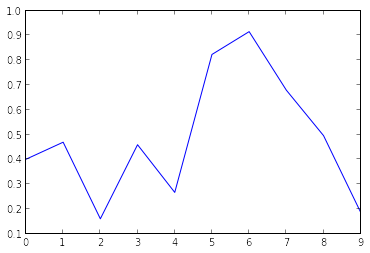

In [3]:

from mpld3 import plugins

fig, ax = plt.subplots()
ax.plot(np.random.random(10))
plugins.clear(fig)  # clear all plugins from the figure

plugins.connect(fig, plugins.Reset(), plugins.BoxZoom(), plugins.Zoom())

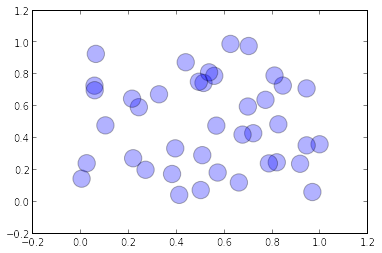

In [4]:
fig, ax = plt.subplots()
points = ax.scatter(np.random.rand(40), np.random.rand(40),
                    s=300, alpha=0.3)

labels = ["Point {0}".format(i) for i in range(40)]
tooltip = plugins.PointLabelTooltip(points, labels)

plugins.connect(fig, tooltip)